# Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('vgsales.csv')

In [3]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [4]:
df.shape

(16598, 11)

In [5]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
df.duplicated().sum()

0

# Clean Data

In [7]:
df.Publisher.value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Lighthouse Interactive             1
Number None                        1
Navarre Corp                       1
Introversion Software              1
Men-A-Vision                       1
Name: Publisher, Length: 578, dtype: int64

In [8]:
df.Year.value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [9]:
df.dropna()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# EDA

## Question 1: Which Genres are the most successful in terms of Global Sales?

In [33]:
#Groupby to order category for graph
gr = df.groupby(["Genre"])['Global_Sales'].aggregate(np.mean).reset_index().sort_values('Global_Sales', ascending=False)

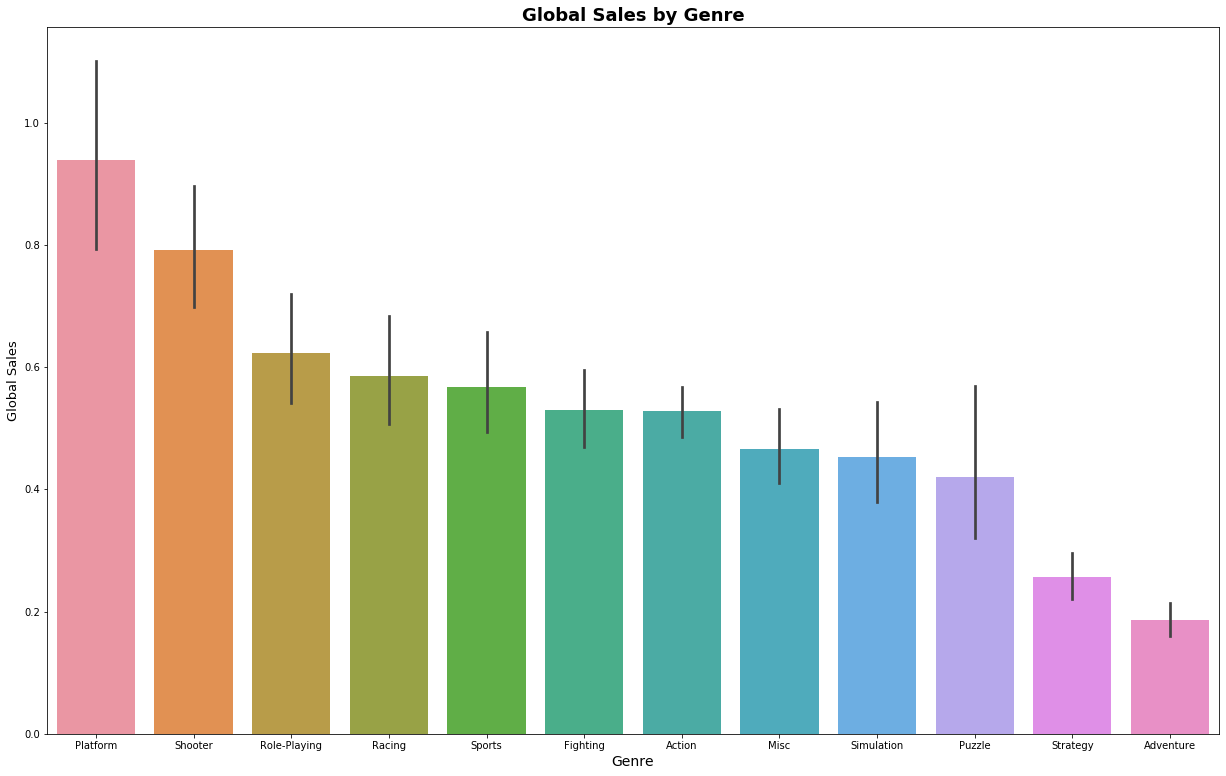

In [39]:
plt.figure(figsize=(21,13))
sns.barplot(x="Genre", y="Global_Sales", data=df, order=gr['Genre'])
plt.title('Global Sales by Genre', fontweight='bold',fontsize=18)
plt.xlabel('Genre',fontsize=14)
plt.ylabel('Global Sales',fontsize=13)
plt.show()

## Question 2: Which Genres are most successful based on Region?

In [40]:
#Groupby to order category for graph
NAS = df.groupby(["Genre"])['NA_Sales'].aggregate(np.mean).reset_index().sort_values('NA_Sales', ascending=False)

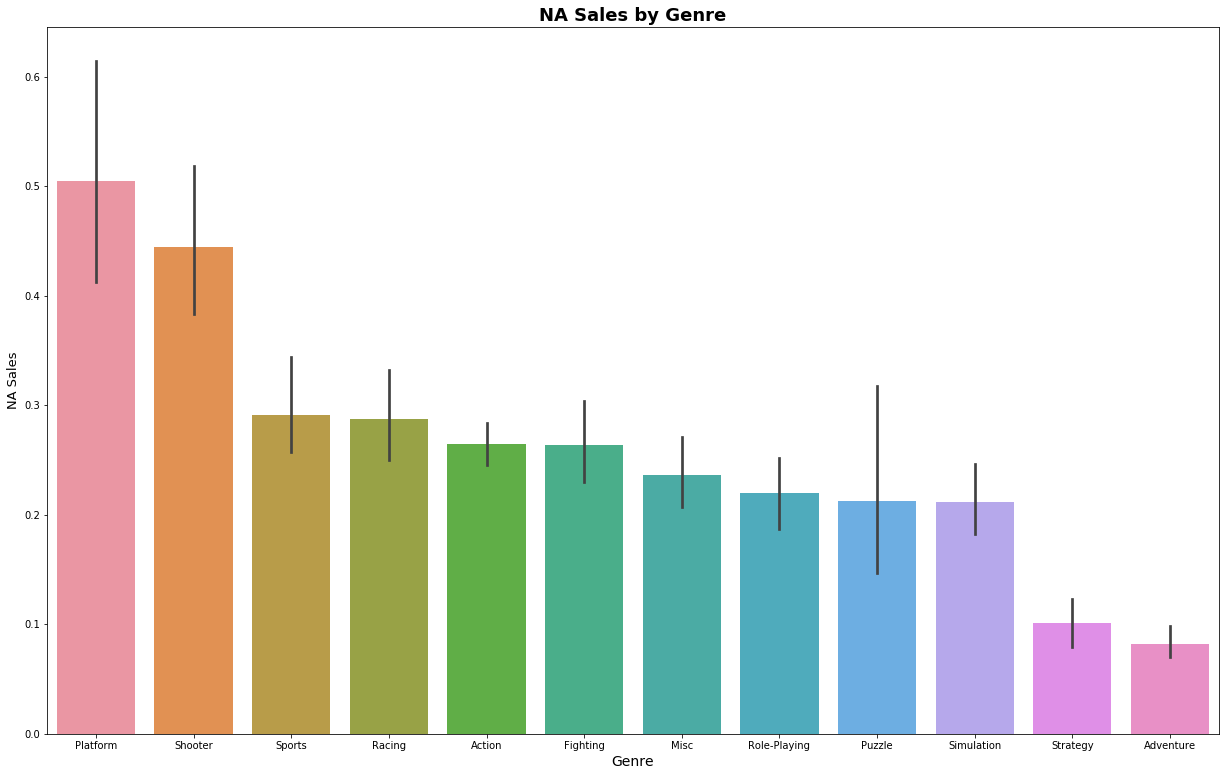

In [41]:
plt.figure(figsize=(21,13))
sns.barplot(x="Genre", y="NA_Sales", data=df, order=NAS['Genre'])
plt.title('NA Sales by Genre', fontweight='bold',fontsize=18)
plt.xlabel('Genre',fontsize=14)
plt.ylabel('NA Sales',fontsize=13)
plt.show()

In [42]:
#Groupby to order category for graph
EUS = df.groupby(["Genre"])['EU_Sales'].aggregate(np.mean).reset_index().sort_values('EU_Sales', ascending=False)

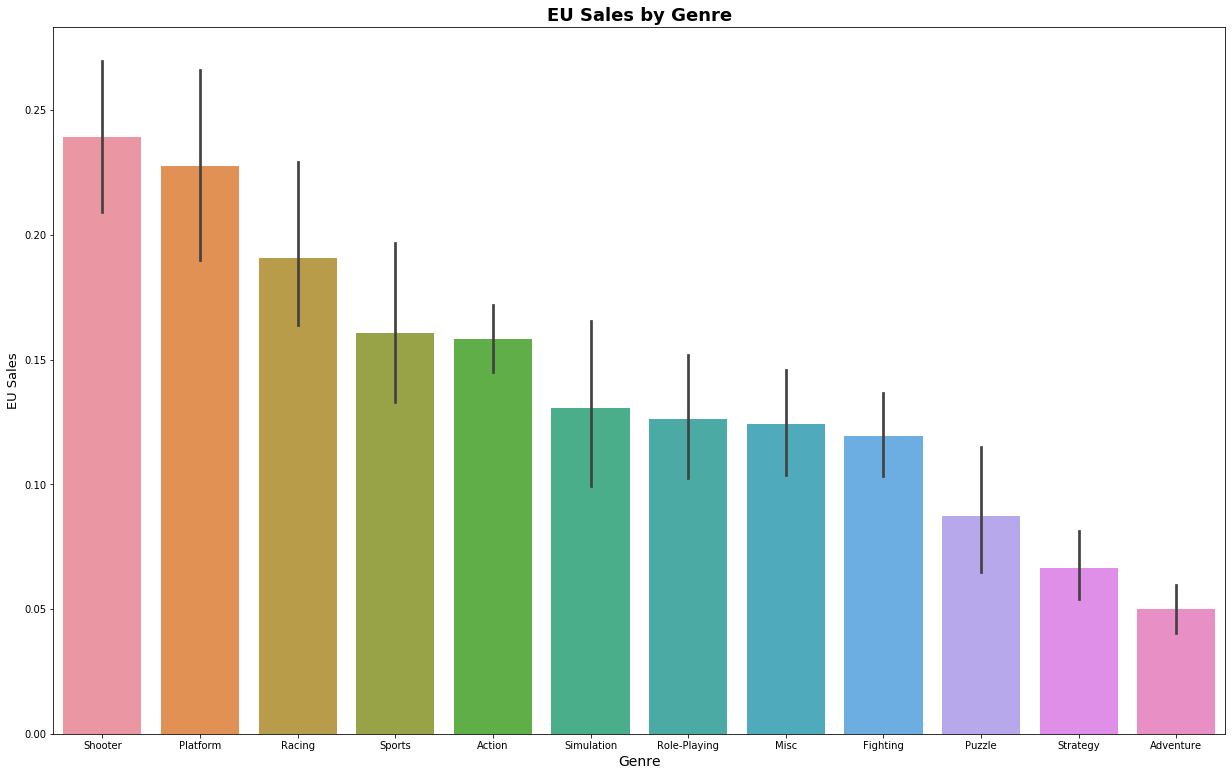

In [43]:
plt.figure(figsize=(21,13))
sns.barplot(x="Genre", y="EU_Sales", data=df, order=EUS['Genre'])
plt.title('EU Sales by Genre', fontweight='bold',fontsize=18)
plt.xlabel('Genre',fontsize=14)
plt.ylabel('EU Sales',fontsize=13)
plt.show()

In [45]:
#Groupby to order category for graph
JPS = df.groupby(["Genre"])['JP_Sales'].aggregate(np.mean).reset_index().sort_values('JP_Sales', ascending=False)

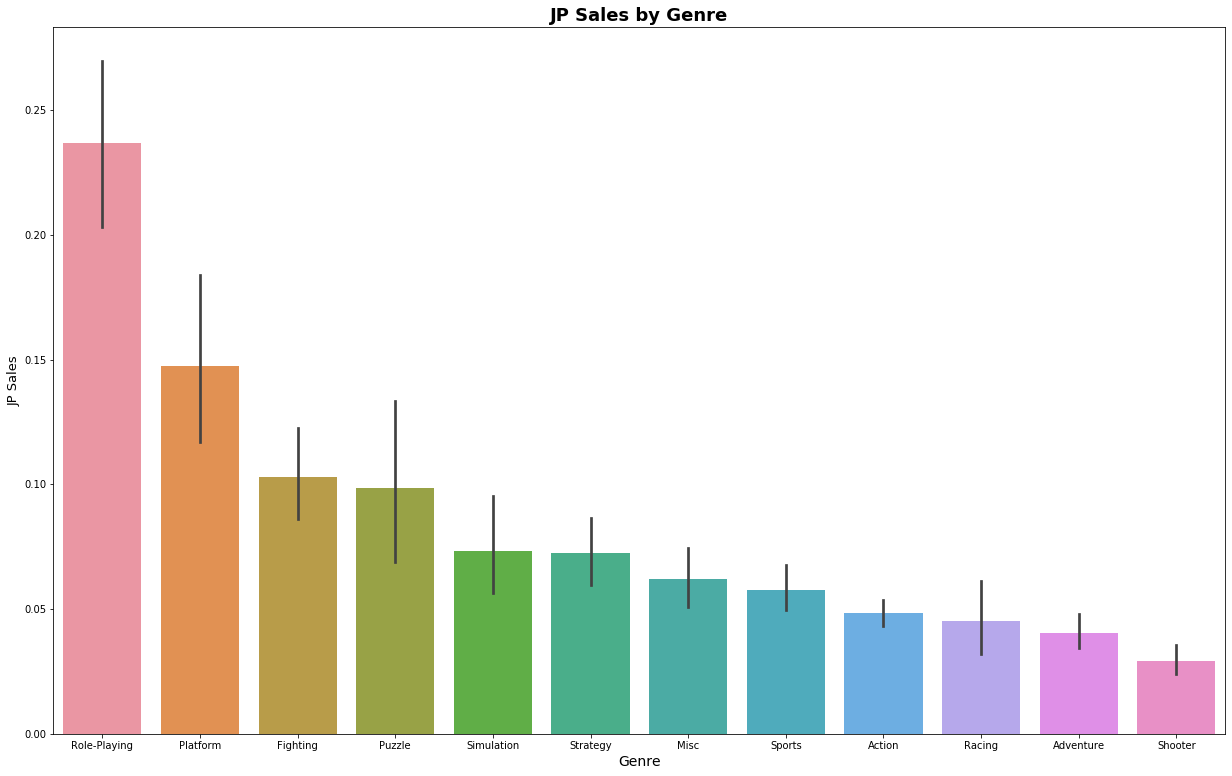

In [46]:
plt.figure(figsize=(21,13))
sns.barplot(x="Genre", y="JP_Sales", data=df, order=JPS['Genre'])
plt.title('JP Sales by Genre', fontweight='bold',fontsize=18)
plt.xlabel('Genre',fontsize=14)
plt.ylabel('JP Sales',fontsize=13)
plt.show()

In [47]:
#Groupby to order category for graph
OtS = df.groupby(["Genre"])['Other_Sales'].aggregate(np.mean).reset_index().sort_values('Other_Sales', ascending=False)

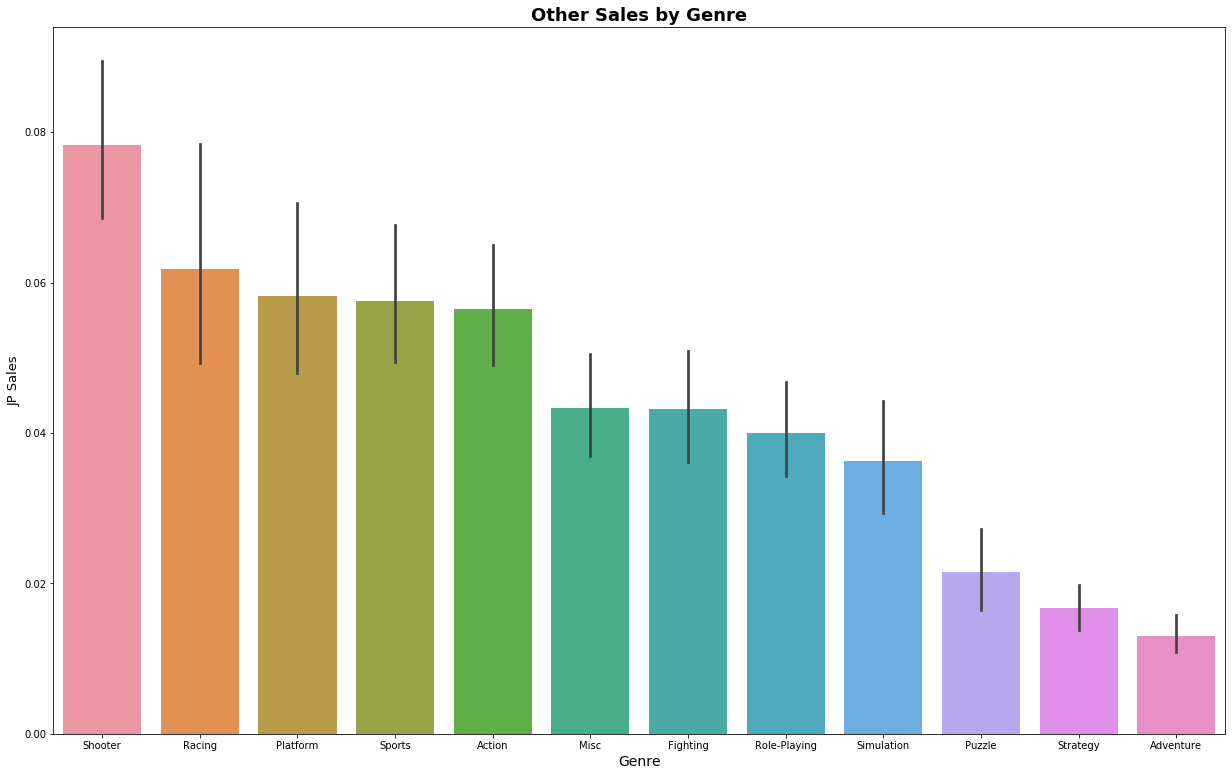

In [49]:
plt.figure(figsize=(21,13))
sns.barplot(x="Genre", y="Other_Sales", data=df, order=OtS['Genre'])
plt.title('Other Sales by Genre', fontweight='bold',fontsize=18)
plt.xlabel('Genre',fontsize=14)
plt.ylabel('JP Sales',fontsize=13)
plt.show()

# Question 3: Which Platforms are most successful in terms of Global Sales?

In [59]:
#Groupby to order category for graph
pls = df.groupby(["Platform"])['Global_Sales'].aggregate(np.mean).reset_index().sort_values('Global_Sales', ascending=False)

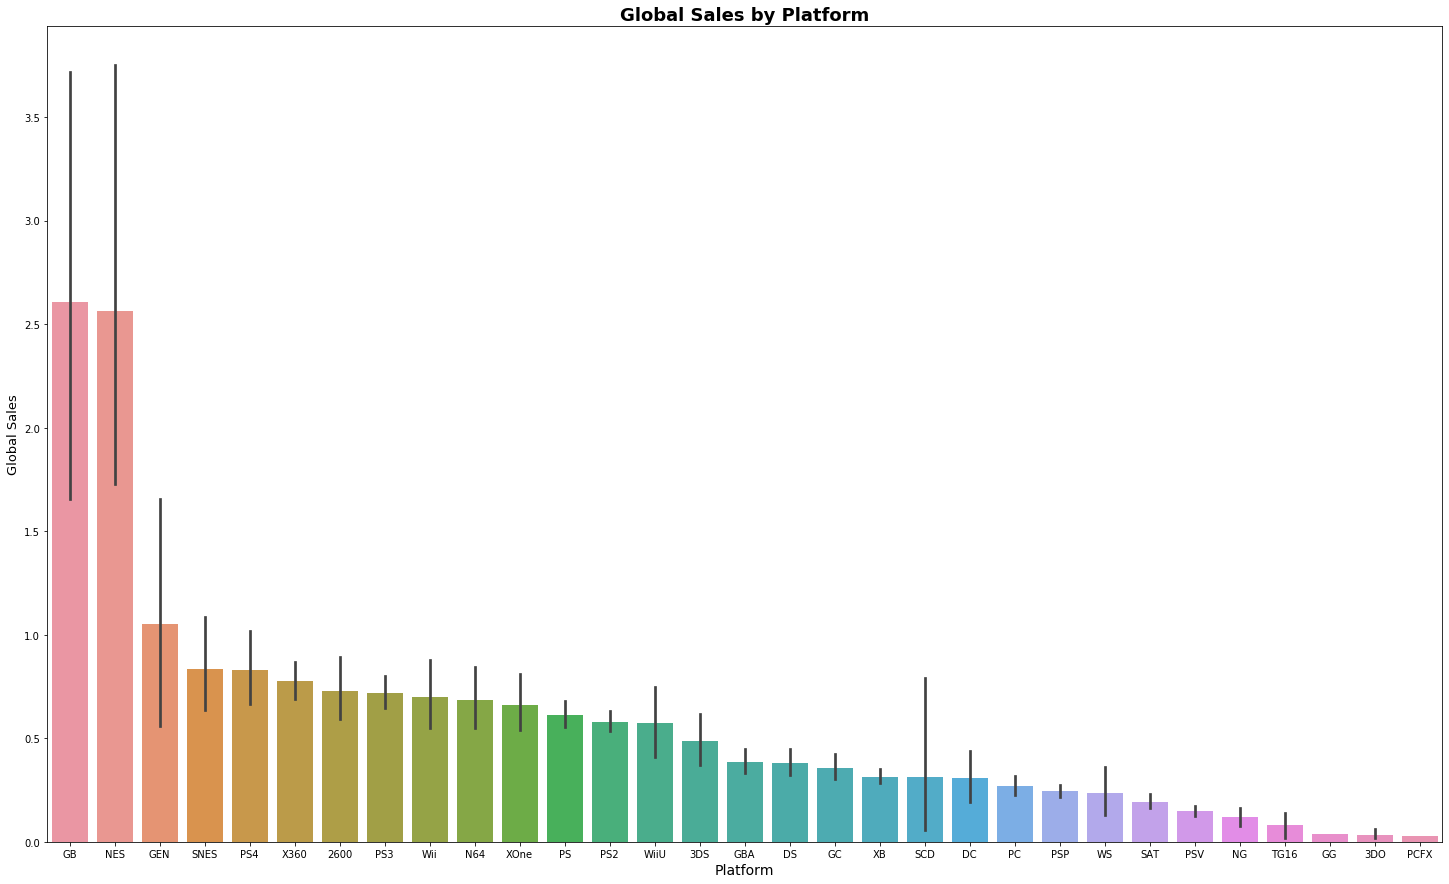

In [65]:
plt.figure(figsize=(25,15))
sns.barplot(x="Platform", y="Global_Sales", data=df, order=pls['Platform'])
plt.title('Global Sales by Platform', fontweight='bold',fontsize=18)
plt.xlabel('Platform',fontsize=14)
plt.ylabel('Global Sales',fontsize=13)
plt.show()

# Question 4: Which are the top 15 publishers and how much have they made in Global Sales?

In [106]:
#Groupby to order category for graph
pus = df.groupby(["Publisher"])['Global_Sales'].aggregate(np.mean).nlargest(15).reset_index().sort_values('Global_Sales', ascending=False)

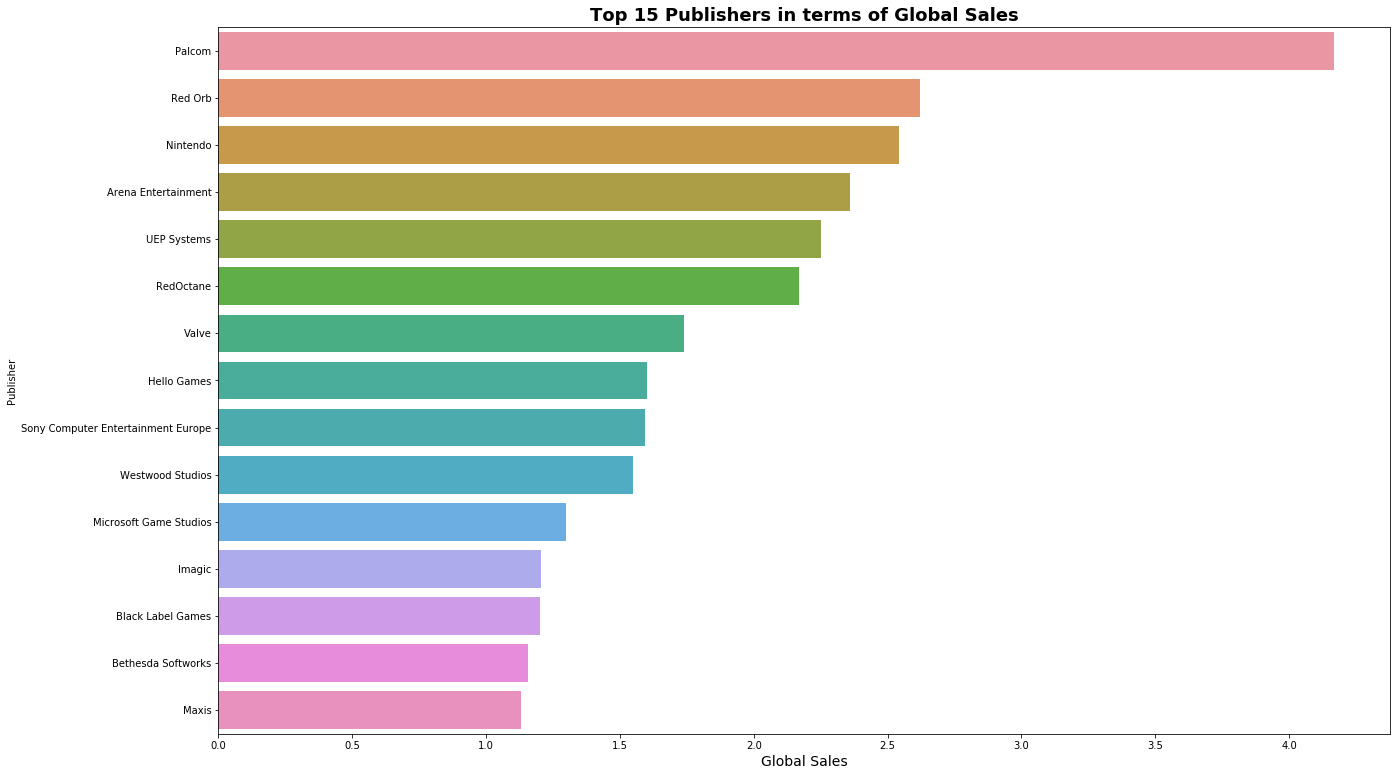

In [111]:
plt.figure(figsize=(21,13))
sns.barplot(x="Global_Sales", y="Publisher", data=df, orient='h', order=pus["Publisher"], ci=None)
plt.title('Top 15 Publishers in terms of Global Sales', fontweight='bold',fontsize=18)
plt.xlabel('Global Sales',fontsize=14)
plt.show()

# Question 5: Which Games Sold the most copies?

In [89]:
# Top 25 rows in terms of Global_Sales
top25g = df.nlargest(25,['Global_Sales'])

In [90]:
#Groupby to order category for graph
ns = top25g.groupby(["Name"])['Global_Sales'].aggregate(np.mean).reset_index().sort_values('Global_Sales', ascending=False)

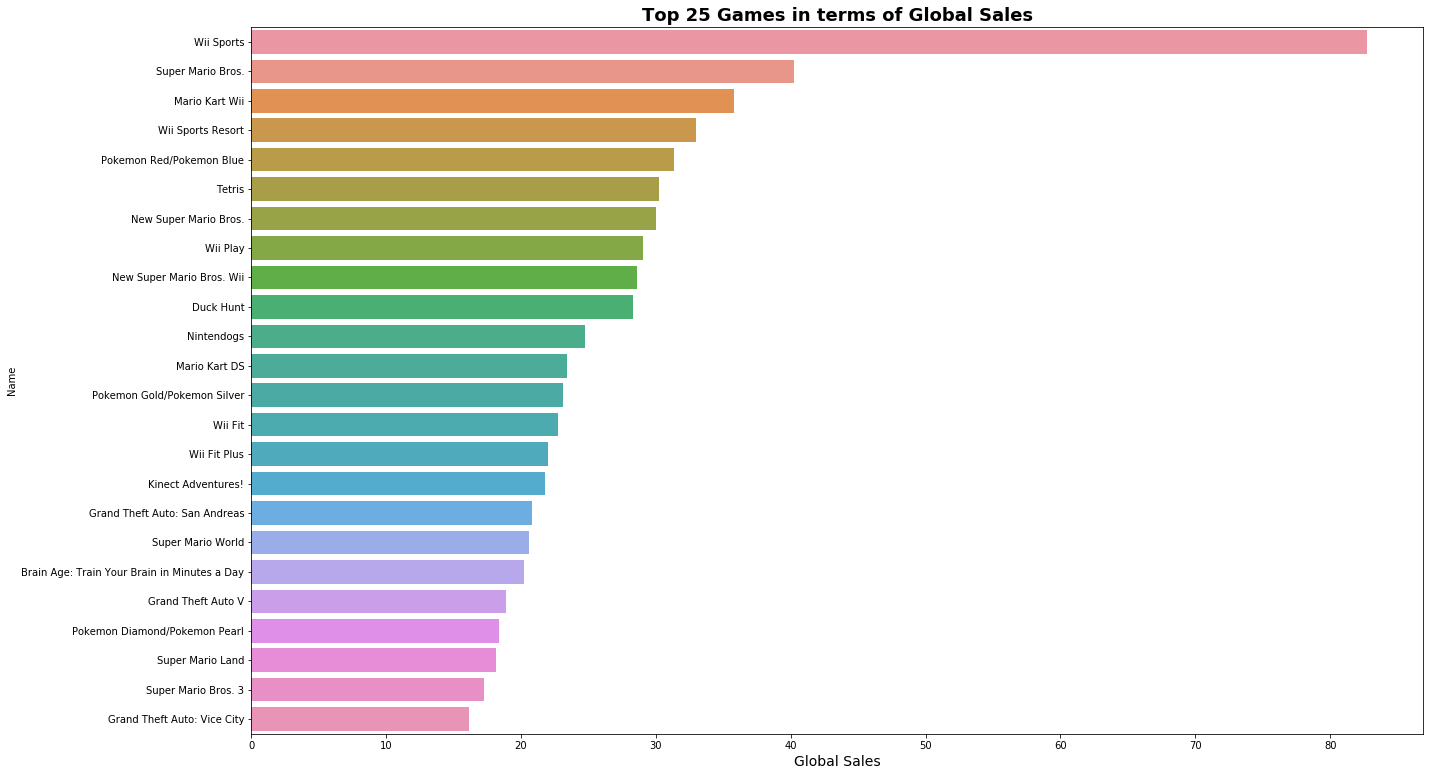

In [112]:
plt.figure(figsize=(21,13))
sns.barplot(x="Global_Sales", y="Name", data=top25g, orient='h', order=ns["Name"], ci=None)
plt.title('Top 25 Games in terms of Global Sales', fontweight='bold',fontsize=18)
plt.xlabel('Global Sales',fontsize=14)
plt.show()

# Question 6: Which years sold the most games?

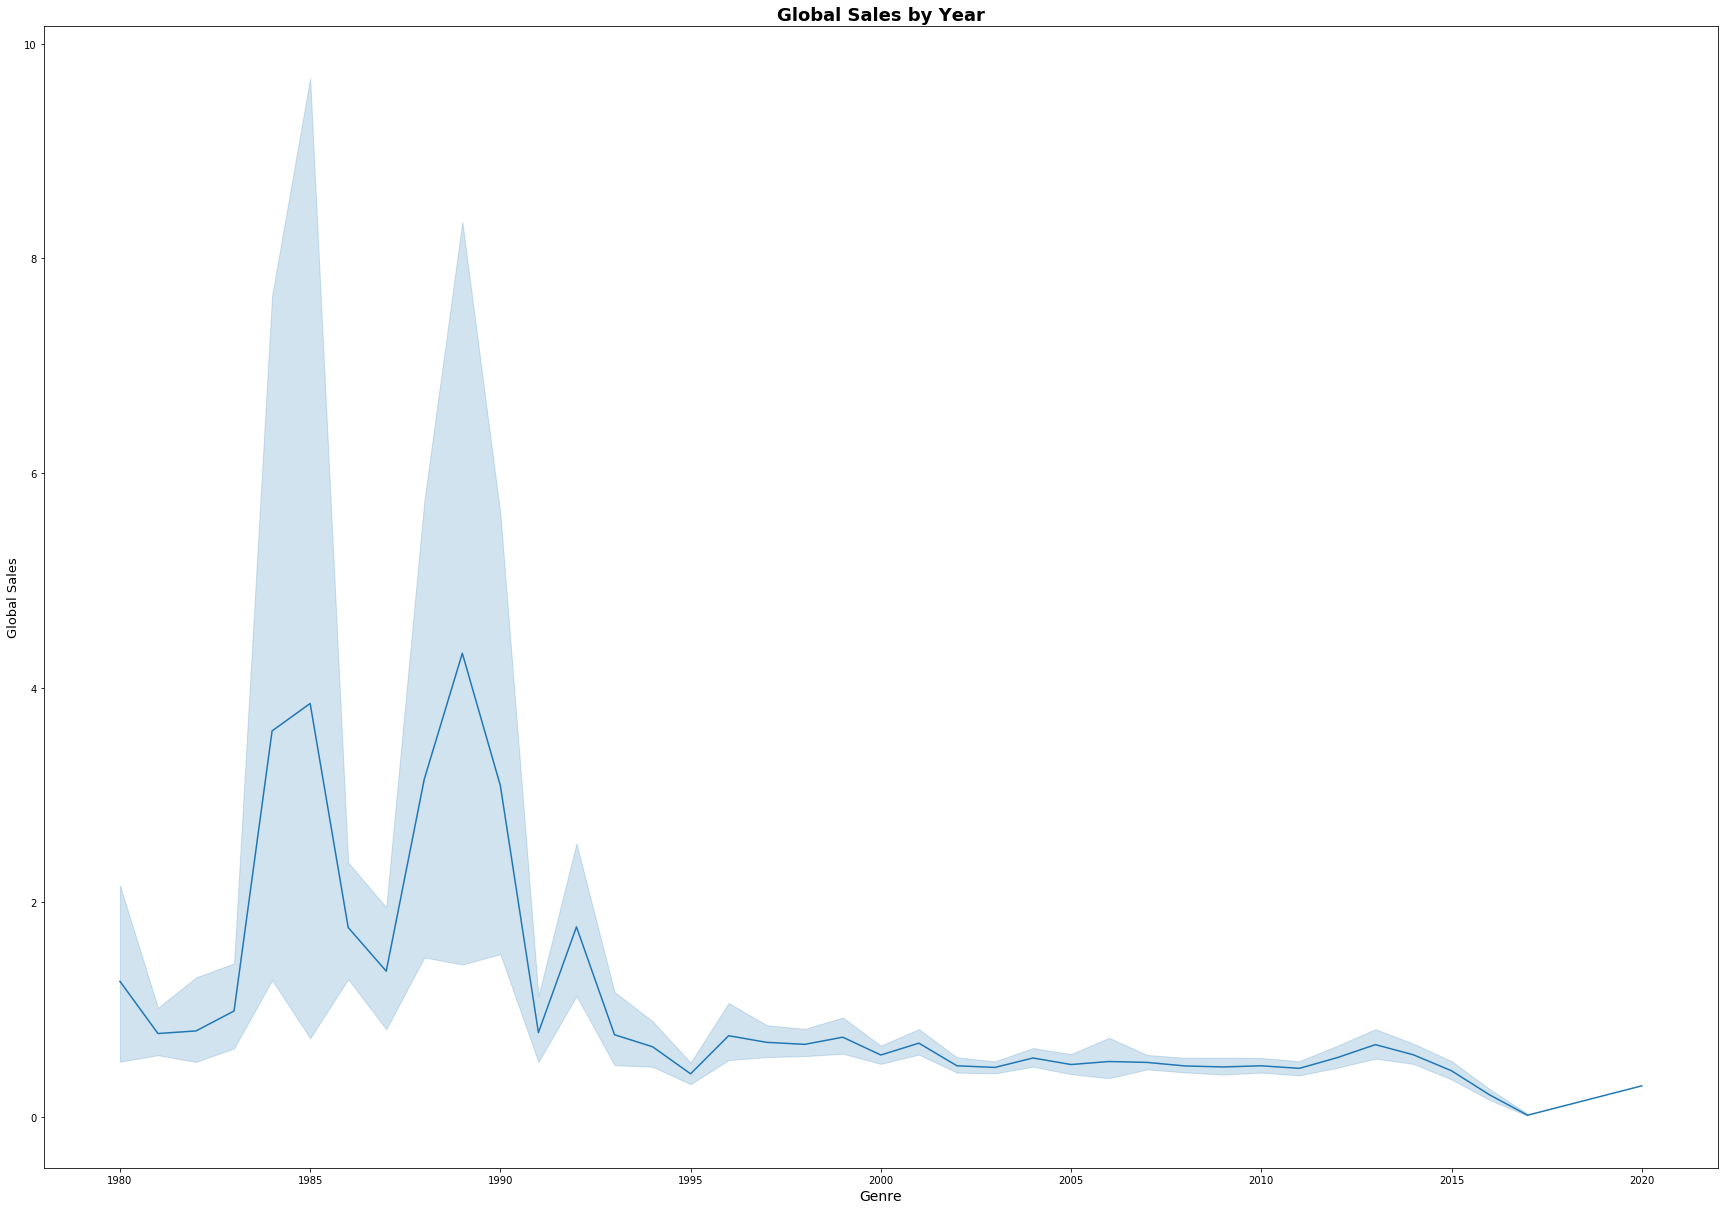

In [37]:
plt.figure(figsize=(30,21))
sns.lineplot(x="Year", y="Global_Sales", data=df, palette='bright')
plt.title('Global Sales by Year', fontweight='bold',fontsize=18)
plt.xlabel('Genre',fontsize=14)
plt.ylabel('Global Sales',fontsize=13)
plt.show()

# Multicollinearity?

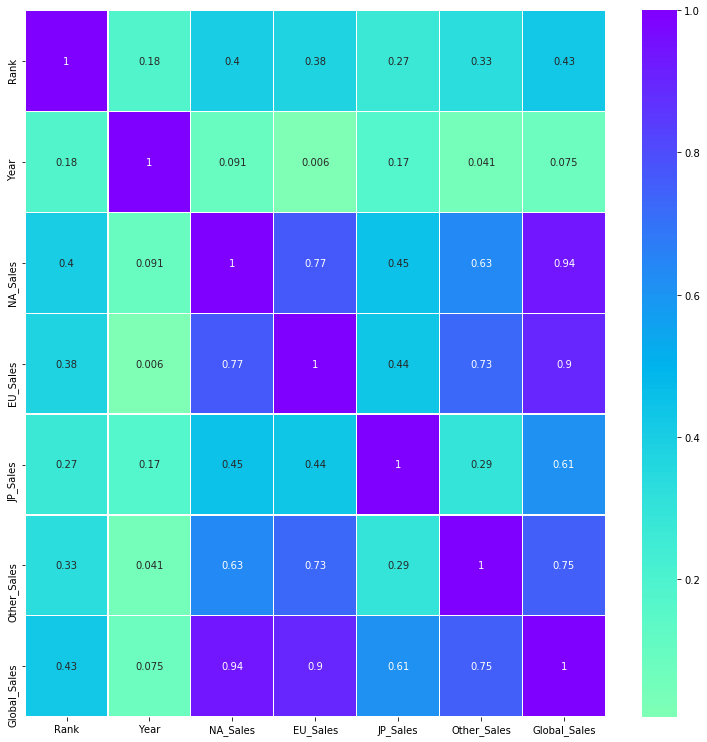

In [25]:
#Create heatmap for absolute values of intercorrelation of features
plt.figure(figsize=(13,13))
sns.heatmap(df.corr().abs(), center=0, annot=True, linewidths=.1, cmap='rainbow_r');
plt.autoscale()
plt.show()

# Model

In [26]:
#Create duplicate df where features will be pruned
dfm = df.copy()

In [27]:
#List features
dfm.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [28]:
#Make df generalizable
dfm = dfm.drop(['Rank', 'Name'], axis=1)

In [29]:
cont_cols = ['Year', 'NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
cat_cols = ['Platform', 'Genre', 'Publisher']

In [30]:
#Display all rows/cols
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
dfm.Publisher.value_counts()

Electronic Arts                           1351
Activision                                 975
Namco Bandai Games                         932
Ubisoft                                    921
Konami Digital Entertainment               832
THQ                                        715
Nintendo                                   703
Sony Computer Entertainment                683
Sega                                       639
Take-Two Interactive                       413
Capcom                                     381
Atari                                      363
Tecmo Koei                                 338
Square Enix                                233
Warner Bros. Interactive Entertainment     232
Disney Interactive Studios                 218
Unknown                                    203
Eidos Interactive                          198
Midway Games                               198
505 Games                                  192
Microsoft Game Studios                     189
Acclaim Enter

In [31]:
dfm[dfm['Publisher'].map(df['Publisher'].value_counts()) < 10]

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
195,PS2,2006.0,Misc,RedOctane,3.81,0.63,0.00,0.68,5.12
276,NES,1989.0,Action,Palcom,3.38,0.44,0.31,0.04,4.17
359,PS,1997.0,Platform,Fox Interactive,1.57,1.79,0.00,0.20,3.56
521,PC,1994.0,Adventure,Red Orb,0.02,2.79,0.00,0.00,2.81
564,GEN,1992.0,Fighting,Arena Entertainment,1.95,0.63,0.00,0.09,2.67
635,PC,1997.0,Adventure,Red Orb,1.52,0.82,0.00,0.10,2.43
646,PS,1996.0,Puzzle,JVC,2.10,0.24,0.00,0.07,2.40
656,PS2,2005.0,Misc,RedOctane,1.67,0.61,0.03,0.07,2.38
691,PC,2012.0,Action,NCSoft,0.95,1.06,0.00,0.29,2.30
715,PS,1997.0,Sports,UEP Systems,1.52,0.46,0.20,0.08,2.25


In [32]:
# Change Publisher with value counts less than 10 to Other
filt = dfm['Publisher'].value_counts()
dfm['Publisher'] = np.where(dfm['Publisher'].isin(filt.index[filt > 10]), dfm['Publisher'], 'Other')

In [33]:
dfm.Publisher.value_counts()

Electronic Arts                           1351
Other                                     1297
Activision                                 975
Namco Bandai Games                         932
Ubisoft                                    921
Konami Digital Entertainment               832
THQ                                        715
Nintendo                                   703
Sony Computer Entertainment                683
Sega                                       639
Take-Two Interactive                       413
Capcom                                     381
Atari                                      363
Tecmo Koei                                 338
Square Enix                                233
Warner Bros. Interactive Entertainment     232
Disney Interactive Studios                 218
Unknown                                    203
Eidos Interactive                          198
Midway Games                               198
505 Games                                  192
Microsoft Gam

# One-hot encoding categorical variables

In [34]:
#View categorical variables
cat_cols

['Platform', 'Genre', 'Publisher']

In [35]:
#Set cols to category type so that Python can regonizes their strings as categories
dfm.Platform = dfm.Platform.astype('category')
dfm.Genre = dfm.Genre.astype('category')
dfm.Publisher = dfm.Publisher.astype('category')

In [36]:
#Create dummies
Platform_dummy = pd.get_dummies(data=dfm['Platform'], prefix='Platform', drop_first=False)
Genre_dummy = pd.get_dummies(data=dfm['Genre'], prefix='Genre', drop_first=False)
Publisher_dummy = pd.get_dummies(data=dfm['Publisher'], prefix='Publisher', drop_first=False)

In [37]:
#Remove categorical columns now that dummies are made
dfm = dfm.drop(['Platform','Genre','Publisher'], axis=1)

In [38]:
#Concatenate the df and the dummies
dfm = pd.concat([dfm, Platform_dummy, Genre_dummy, Publisher_dummy], axis=1)